# Обязательная часть

Вам необходимо провести базовый EDA выбранного набора данных.
Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).


In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 9,6

In [2]:
# данные об уровне счастья в разных странах с 2015 по 2021 года
df_2015 = pd.read_csv('/Users/viktoria/Documents/Netology/theory/11_Visualization/Datasets/archive/2015.csv')
df_2016 = pd.read_csv('/Users/viktoria/Documents/Netology/theory/11_Visualization/Datasets/archive/2016.csv')
df_2017 = pd.read_csv('/Users/viktoria/Documents/Netology/theory/11_Visualization/Datasets/archive/2017.csv')
df_2018 = pd.read_csv('/Users/viktoria/Documents/Netology/theory/11_Visualization/Datasets/archive/2018.csv')
df_2019 = pd.read_csv('/Users/viktoria/Documents/Netology/theory/11_Visualization/Datasets/archive/2019.csv')
df_2020 = pd.read_csv('/Users/viktoria/Documents/Netology/theory/11_Visualization/Datasets/archive/2020.csv')
df_2021 = pd.read_csv('/Users/viktoria/Documents/Netology/theory/11_Visualization/Datasets/archive/2021.csv')

In [3]:
# приводим данные к единому виду
res_2015 = df_2015.copy()
res_2015 = res_2015.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]]
res_2015.columns = ['Country','Region','Happiness Rank','Happiness Score','Standard Error','GDP per capita','Family','Healthy life expectancy','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']
res_2015['Year'] = 2015

res_2016 = df_2016.copy()
res_2016 = res_2016.iloc[:,[0,1,2,3,6,7,8,9,10,11,12]]
res_2016.columns = ['Country','Region','Happiness Rank','Happiness Score','GDP per capita','Family','Healthy life expectancy','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']
res_2016['Year'] = 2016

res_2017 = df_2017.copy()
res_2017 = res_2017.iloc[:,[0,1,2,5,6,7,8,9,10,11]]
res_2017.columns = ['Country','Happiness Rank','Happiness Score','GDP per capita','Family','Healthy life expectancy','Freedom','Generosity','Trust (Government Corruption)','Dystopia Residual']
res_2017['Year'] = 2017

res_2018 = df_2018.copy()
res_2018 = res_2018.iloc[:,[1,0,2,3,4,5,6,7,8]]
res_2018.columns = ['Country','Happiness Rank','Happiness Score','GDP per capita','Social support','Healthy life expectancy','Freedom','Generosity','Trust (Government Corruption)']
res_2018['Year'] = 2018

res_2019 = df_2019.copy()
res_2019 = res_2019.iloc[:,[1,0,2,3,4,5,6,7,8]]
res_2019.columns = ['Country','Happiness Rank','Happiness Score','GDP per capita','Social support','Healthy life expectancy','Freedom','Generosity','Trust (Government Corruption)']
res_2019['Year'] = 2019

res_2020 = df_2020.copy()
res_2020 = res_2020.iloc[:,[0,1,2,3,6,7,8,9,10,11,19]]
res_2020.columns = ['Country','Region','Happiness Score','Standard Error','Logged GDP per capita','Social support','Healthy life expectancy','Freedom','Generosity','Trust (Government Corruption)','Dystopia Residual']
res_2020['Healthy life expectancy'] = res_2020['Healthy life expectancy'].apply(lambda x: x / 100)
res_2020['Happiness Rank'] = res_2020['Happiness Score'].rank(method='dense', ascending=False)
res_2020['Year'] = 2020

res_2021 = df_2021.copy()
res_2021 = res_2021.iloc[:,[0,1,2,3,6,7,8,9,10,11,19]]
res_2021.columns = ['Country','Region','Happiness Score','Standard Error','Logged GDP per capita','Social support','Healthy life expectancy','Freedom','Generosity','Trust (Government Corruption)','Dystopia Residual']
res_2021['Healthy life expectancy'] = res_2021['Healthy life expectancy'].apply(lambda x: x / 100)
res_2021['Happiness Rank'] = res_2021['Happiness Score'].rank(method='dense', ascending=False)
res_2021['Year'] = 2021

### График 1 

In [4]:
'''Определим стран-лидиров по уровню счастья с 2015 по 2021 гг'''
# создаем единую таблицу данных
from functools import reduce
data_set = [res_2015.iloc[:,[0,2,12]], res_2016.iloc[:,[0,2,11]], res_2017.iloc[:,[0,1,10]], res_2018.iloc[:,[0,1,9]], res_2019.iloc[:,[0,1,9]], res_2020.iloc[:,[0,11,12]], res_2021.iloc[:,[0,11,12]]]
data_all_years = reduce(lambda  left,right: pd.merge(left,right,on=['Country','Happiness Rank','Year'], how='outer'), data_set)

# создаем функцию для оформления
def colour_rank(value):
    if value == 1:
        color = 'deeppink'
    elif value == 2:
        color = 'steelblue'
    elif value == 3:
        color = 'silver'
    else:
        color = 'default'
    return 'background-color: %s' % color

In [12]:
# формируем рейтинг
data_all_years_rank = data_all_years.pivot(index='Country', columns='Year', values=['Happiness Rank'])
data_all_years_rank['AVG'] = data_all_years_rank.mean(axis = 1)
data_all_years_rank = data_all_years_rank.sort_values(by = ['AVG'])
data_all_years_rank['Rank'] = range(1, len(data_all_years_rank)+1)
data_all_years_rank.style.set_precision(2).applymap(colour_rank, subset = ['Happiness Rank', 'Rank'])

Выводы:
1. На протяжении 7 лет северные страны сохраняют высокие позиции по уровню счастья
2. В разрезе 7 последних лет Дания занимает 1-е место, несмотря на факт лидерства лишь в 2016 году
3. Норвегия с 2018 года

### График 2

In [6]:
'''Определим топ-5 стран-лидеров и стран-аутсайдеров по уровню счастья за 2015-2021 года'''
# создаем единую таблицу данных
data_list = [res_2015.iloc[:,[0,3,12]], res_2016.iloc[:,[0,3,11]], res_2017.iloc[:,[0,2,10]], res_2018.iloc[:,[0,2,9]], res_2019.iloc[:,[0,2,9]], res_2020.iloc[:,[0,2,12]], res_2021.iloc[:,[0,2,12]]]
data_all_scores = reduce(lambda  left,right: pd.merge(left,right,on=['Country','Happiness Score','Year'], how='outer'), data_list)

# формируем объединенную таблицу
data_all_scores_rank = data_all_scores.pivot_table(index='Country', columns='Year', values=['Happiness Score'])
data_all_scores_rank = data_all_scores_rank.reset_index()  
data_all_scores_rank['AVG'] = data_all_scores_rank.mean(axis = 1)
data_all_scores_rank = data_all_scores_rank.sort_values(by = ['AVG'], ascending = False)
data_all_scores_rank['Rank'] = range(1, len(data_all_scores_rank)+1)
data_all_scores_rank = data_all_scores_rank.set_index(['Country', 'Rank'])

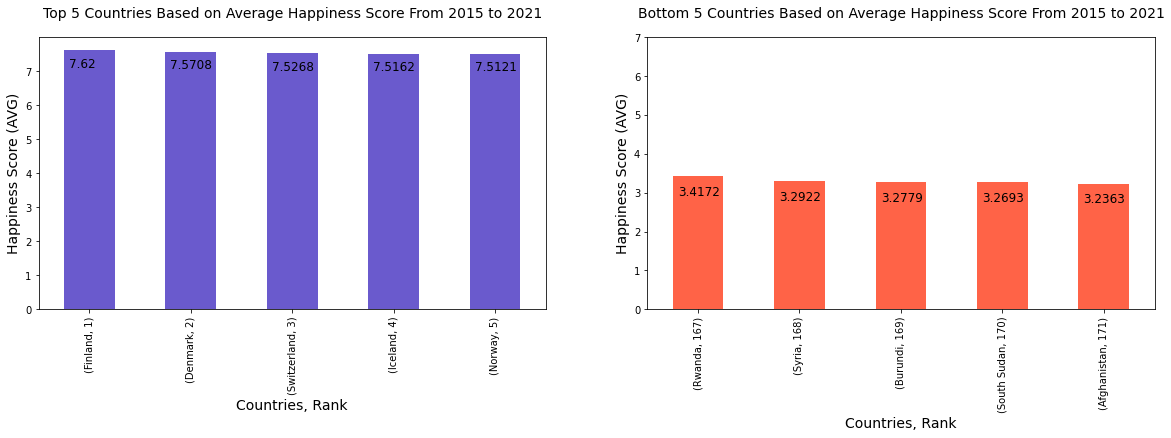

In [20]:
# оформляем столбчатые диаграммы
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title('Top 5 Countries Based on Average Happiness Score From 2015 to 2021', fontsize = 14, y=1.05)
data_all_scores_rank[0:5]['AVG'].plot(kind = 'bar', color='slateblue')
plt.xlabel('Countries, Rank', fontsize=14)
plt.yticks(np.arange(0, 8, step = 1))
for index,data in enumerate(np.round(data_all_scores_rank[0:5]['AVG'], 4)):
    plt.text(x=index-0.2 , y =data-0.5 , s=f"{data}" , fontdict=dict(fontsize=12))
plt.ylabel('Happiness Score (AVG)', fontsize=14)

plt.subplot(1,2,2)    
plt.title('Bottom 5 Countries Based on Average Happiness Score From 2015 to 2021', fontsize = 14, y=1.05)
data_all_scores_rank[-6:-1]['AVG'].plot(kind = 'bar', color = 'tomato')
plt.xlabel('Countries, Rank', fontsize=14)
plt.yticks(np.arange(0, 8, step = 1))
for index,data in enumerate(np.round(data_all_scores_rank[-6:-1]['AVG'], 4)):
    plt.text(x=index-0.2 , y =data-0.5 , s=f"{data}" , fontdict=dict(fontsize=12))
plt.ylabel('Happiness Score (AVG)', fontsize=14)

plt.show()

Выводы:
1. В топ-5 самых "счастливых" стран входят в основном северные страны, что свидетельствует от том, что уровень счастья в большей степени зависит от экономического и социального развития и в меньшей степени - от климатических условий
2. В топ-5 "несчастливых" стран ожидаемо входят страны с нестабильной политической и экономической ситуацией

### График 3

Text(0.5, 1.0, 'Countplot of Happiness Regions by Happiness Score, 2021')

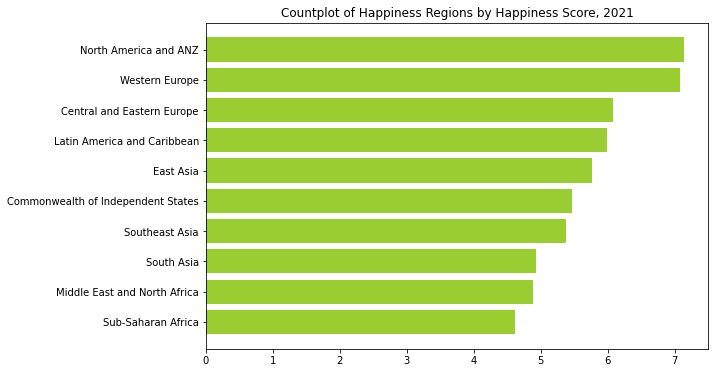

In [21]:
'''Составим рейтинг регионов по уровню счастья за 2021 год'''
res_2021_reg = res_2021.copy()
res_2021_reg = res_2021_reg.iloc[:,[1,2]]

# считаем медианный показатель уровня счастья для регионов
res_2021_reg['Reg_Score'] = None
res_2021_reg['Reg_Score'].fillna(res_2021_reg.groupby(['Region'])['Happiness Score'].transform('median'), inplace=True)
res_2021_reg.head(50)

# сортируем таблицу
res_2021_reg = res_2021_reg.sort_values(by=['Reg_Score'])

# создаем горизонтальную гистограмму
plt.barh(y=res_2021_reg['Region'], width=res_2021_reg['Reg_Score'], color='yellowgreen')
plt.title('Countplot of Happiness Regions by Happiness Score, 2021')

Выводы:
1. По уровню счастья очевидно лидируют регионы: Северная Америка, Австралия, Новая Зеландия и Западная Европа, опережая остальные регионы почти на целый балл
2. Любопытно, что Центральная и Восточная Европа по уровню счатья близки с Латинской Америкой и Карибскими островами, однако страны СНГ, выделенные отдельно, еще на порядок ниже в рейтинге
3. Согласно рейтингу Азия очень не однородна: уровень счастья в Южной Азии сопоставим с уровнем в Северной Африке
4. Самым "несчастливым" регионом оказалась Тропическая Африка, что также было вполне предсказуемо с учетом параметров рейтига 

### График 4

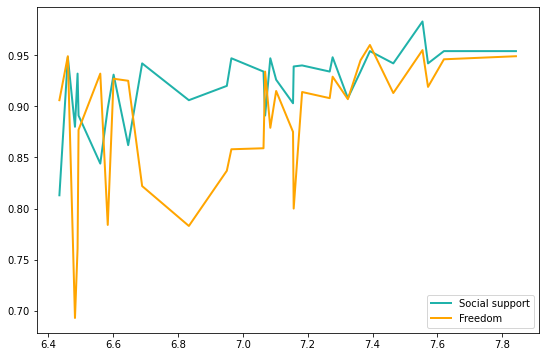

In [55]:
'''Посмотрим зависимость Happiness Score от параметров Social support и Freedom для 30 стран-лидеров за 2021 год'''
top_30_countries = res_2021.iloc[:30,:]

plt.plot( 'Happiness Score', 'Social support', data=top_30_countries, marker='', color='lightseagreen', linewidth=2)
plt.plot( 'Happiness Score', 'Freedom', data=top_30_countries, marker='', color='orange', linewidth=2)

plt.legend(loc='lower right')
plt.show()

Выводы:
1. График показывает, что в целом параметры "социальная поддержка" и "свобода" коррелируются с уровенем счастья, т.к. для 30 "счастливых" стран значения этих показателей достаточно высоки (от 0.82 и 0.68 соотвественно)
2. В целм для 30 стран можно сделать вывод, что "социальная поддержка" чуть значительнее для уровня счастья, чем "свобода" 
3. На графике выделяются страны с высоким показателем уровнем счастья, но с невысоким значением параметра "свобода", при проверке этими странами оказались: Италя, Испания, Бельгия, Тайвань

# Дополнительная часть

- построить дополнительно не менее 2 визуализаций (итого не менее 6);
- в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;

### График 5 

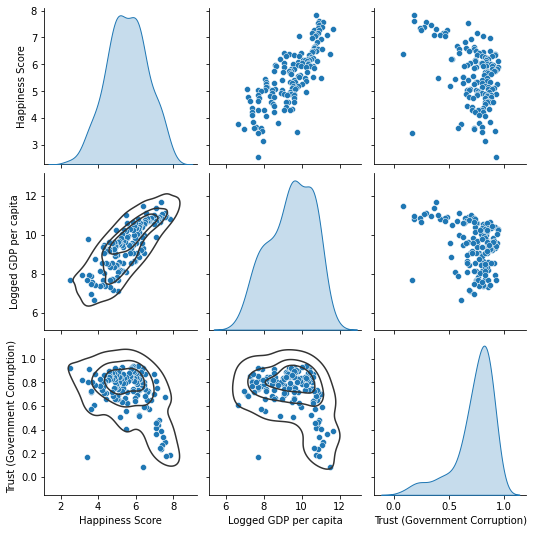

In [74]:
'''Посмотрим зависимость Happiness Score от параметров GDP и Trust за 2021 год'''
# построим scatter plot matrix
import seaborn as sns
g = sns.pairplot(res_2021[['Happiness Score', 'Logged GDP per capita', 'Trust (Government Corruption)']], diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

Выводы:
1. Согласно предсталенным данным уровень счастья напрямую зависит от ВВП на душу населения, хотя есть и исключения в виде Ботсваны и Индии с высоким ВВП (9.78 и 8.76 соотвественно) и низким уровнем счастья (3.47 и 3.82 соотвественно)
2. Высокий уровень коррупции (недоверия власти) характерен и для относительно "счастливых" стран, однако можно заметить, что для десятка самых "счастливых" стран характерен низкий уровень коррумпированности власти; интересным примером является Руанда, где уровень коррупции - 0.167 и при этом уровень счастья - 3.415
3. Схожая п.2 и зависимость между ВВП и коррумпированностью властных структур: как видно, для многих стран высокий ВВП не следует из низкого уровня коррупции

In [85]:
# поиск примеров для выводов
res_2021.sort_values(['Happiness Score', 'Logged GDP per capita'], ascending=[True,False]).head(30)
res_2021.sort_values(['Happiness Score', 'Trust (Government Corruption)'], ascending=[True,True]).head(30)

,Country,Region,Happiness Score,Standard Error,Logged GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Happiness Rank,Year
148,Afghanistan,South Asia,2.523,0.038,7.695,0.463,0.52493,0.382,-0.102,0.924,1.895,147.0,2021
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,7.943,0.750,0.56201,0.677,-0.047,0.821,1.205,146.0,2021


### График 6

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='Region'>

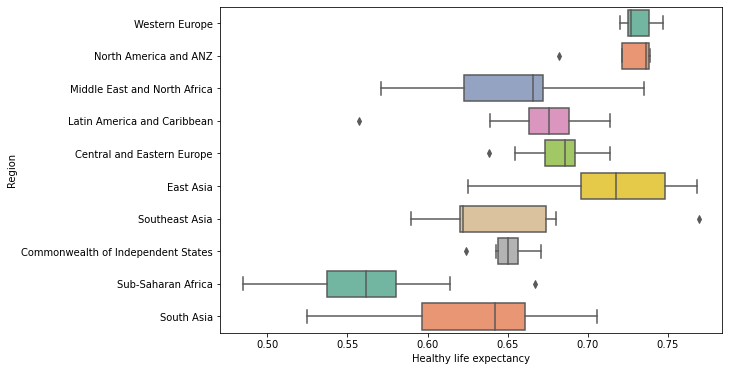

In [99]:
'''Сравним ожидаемую продолжительность жизни по регионам за 2021 год'''
# построим boxplot
res_2021_exp = res_2021.copy()
res_2021_exp = res_2021_exp.iloc[:,[1,6]]

exp_by_region = res_2021_exp['Region'].value_counts().sort_values(ascending = False).head(10).index.values
exp_by_region
sns.boxplot(x="Healthy life expectancy", y="Region", data=res_2021_exp[res_2021_exp['Region'].isin(exp_by_region)], orient="h", linewidth=1.5, palette="Set2")

Выводы:
1. В целом, показатель ожидаемой продолжительности здоровой жизни сопостовим с рейтингом регионов по уровню счастья
2. Для Южной Азии, Восточной Азии и Африки характерен сильный разброс показателей: регионы не однородны по данному показателю, в отличие от Западной Европы и Северной Америки; при этом часть стран Восточной Азии имеют показатель продолжительности жизни выше, чем у регионов-лидеров
3. Выбросом для Юго-Восточной Азии является Сингпур с самым высоким в мире показателем ожидаемой продолжительности жизни (0.7695)